### Importando dataframe

In [33]:
from pandas import read_csv, read_excel

from scipy.stats import chi2_contingency

from myFunctions import multiple_series_line_Chart

import seaborn as sns
import matplotlib.pyplot as plt



df = read_csv('../Data/CSV/csv_sifilis_moc_2019_2023.csv', sep=",", encoding='latin1', engine='python', thousands='.', decimal=',')

In [34]:
df.head()

,Data_Notificacao,Ano,ID_MUNICIP,Unidade,DT_DIAG,Idade,TriGestacional,Raca,Escolaridade,Residencia,TPCONFIRMA,Tratamento,TPMOTPARC,TPESQPAR,TratamentoParceiro,CLASSI_FIN
0,1/8/2021,2021,314330,2219654,12/23/2020,22,3º,Parda,Ignorado,Urbana,1.0,Não realizado,Não Informado,5.0,2.0,1.0
1,2/6/2021,2021,314330,2219654,2/6/2021,17,3º,Parda,Ignorado,Urbana,3.0,PGB 7.200.000 UI,60,5.0,2.0,1.0
2,2/11/2021,2021,314330,2149990,2/1/2021,26,3º,Branca,Ignorado,Urbana,1.0,PGB 7.200.000 UI,Não Informado,5.0,2.0,1.0
3,2/16/2021,2021,314330,2219654,2/13/2021,23,1º,Parda,Médio completo,Urbana,9.0,PGB 7.200.000 UI,20,5.0,2.0,1.0
4,2/13/2021,2021,314330,2219654,2/12/2021,28,3º,Parda,Ignorado,Ignorado,1.0,PGB 7.200.000 UI,Não Informado,5.0,2.0,1.0


### Analisando proporções

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def multiple_series_line_Chart(coluna, DataFrame):
    df = DataFrame.copy()

    # Agrupar por ano e coluna de interesse
    df_grouped = df.groupby(['Ano', coluna]).size().unstack(fill_value=0)

    # Plotar gráfico de linhas
    df_grouped.plot(kind='line', marker='o', figsize=(12, 6))

    plt.title(f'Evolução temporal da variável: {coluna}')
    plt.xlabel('Ano')
    plt.ylabel('Número de casos')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Eixo Y com mais graduação
    max_y = df_grouped.max().max()
    step_y = max(1, int(max_y // 10))
    plt.yticks(np.arange(0, max_y + step_y, step_y))

    # Eixo X com apenas anos inteiros
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xticks([int(x) for x in df_grouped.index])

    plt.legend(title=coluna)
    plt.tight_layout()
    plt.show()


#### Zonas de residências das gestantes com sífilis 2019 à 2023


Residência por gestante:
Residencia
Urbana      98.24
Rural        1.44
Ignorado     0.32
Name: proportion, dtype: float64

Residência por gestante em 2019:
Residencia
Urbana    99.212598
Rural      0.787402
Name: proportion, dtype: float64

Residência por gestante em 2020:
Residencia
Urbana    100.0
Name: proportion, dtype: float64

Residência por gestante em 2021:
Residencia
Urbana      96.103896
Rural        2.597403
Ignorado     1.298701
Name: proportion, dtype: float64

Residência por gestante em 2022:
Residencia
Urbana    98.319328
Rural      1.680672
Name: proportion, dtype: float64

Residência por gestante em 2023:
Residencia
Urbana    98.058252
Rural      1.941748
Name: proportion, dtype: float64


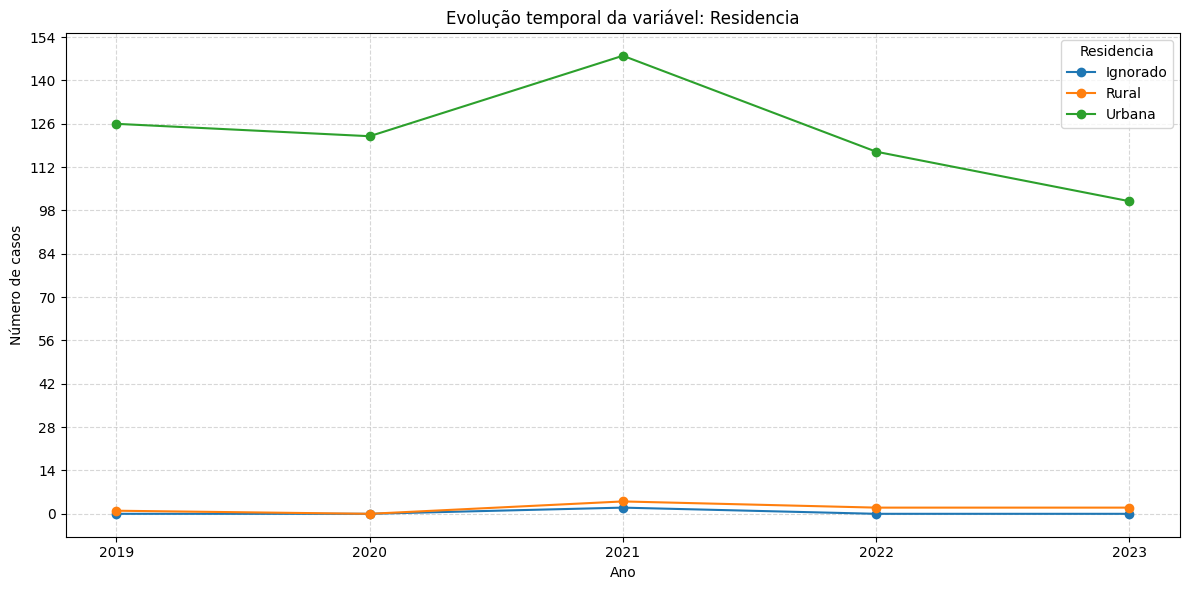

In [36]:

#Zona de residência: Frequência por zona (rural, urbana, etc.).
print("\nResidência por gestante:")
print(df['Residencia'].value_counts(normalize=True) * 100)
# Proporções para o ano de 2019
print("\nResidência por gestante em 2019:")
print(df[df['Ano'] == 2019]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nResidência por gestante em 2020:")
print(df[df['Ano'] == 2020]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nResidência por gestante em 2021:")
print(df[df['Ano'] == 2021]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nResidência por gestante em 2022:")
print(df[df['Ano'] == 2022]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nResidência por gestante em 2023:")
print(df[df['Ano'] == 2023]['Residencia'].value_counts(normalize=True) * 100)

multiple_series_line_Chart('Residencia', DataFrame = df)




#### Zonas de residências das gestantes com sífilis 2019 à 2023


Raça por gestante:
Raca
Parda                      64.32
Não Assinalado na Ficha    21.44
Branca                      7.36
Preta                       6.40
Amarela                     0.32
Indígena                    0.16
Name: proportion, dtype: float64

Raça por gestante em 2019:
Raca
Parda                      78.740157
Preta                       7.086614
Branca                      7.086614
Não Assinalado na Ficha     5.511811
Indígena                    0.787402
Amarela                     0.787402
Name: proportion, dtype: float64

Raça por gestante em 2020:
Raca
Parda                      64.754098
Não Assinalado na Ficha    27.049180
Branca                      4.918033
Preta                       3.278689
Name: proportion, dtype: float64

Raça por gestante em 2021:
Raca
Parda                      64.285714
Não Assinalado na Ficha    20.129870
Branca                      8.441558
Preta                       6.493506
Amarela                     0.649351
Name: proportion, dtype:

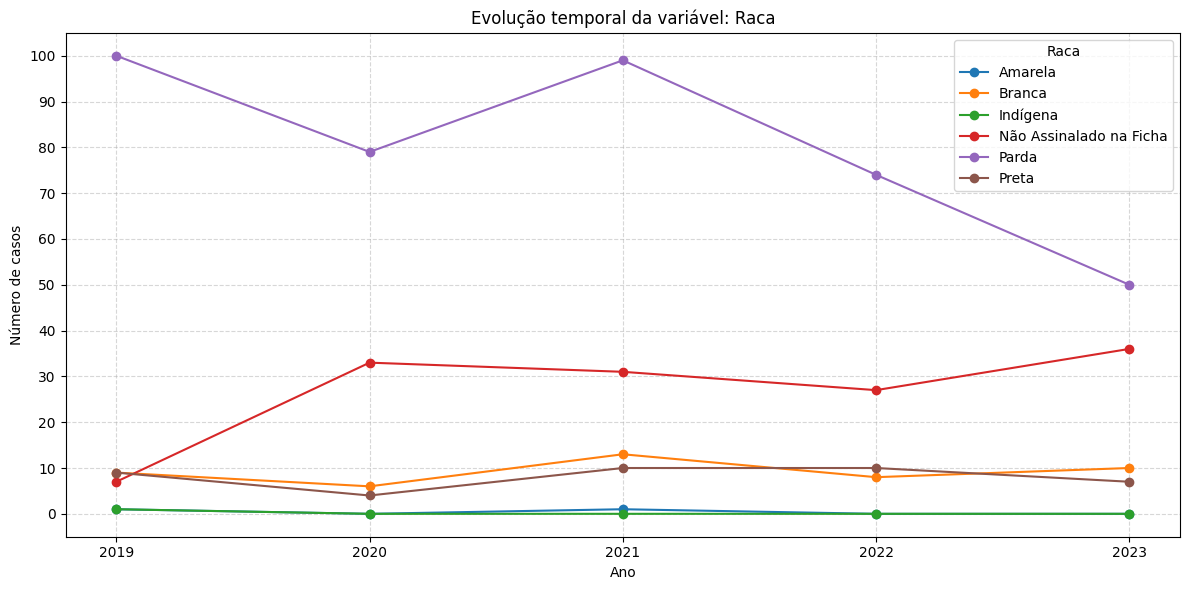

In [37]:
#Raça da gestante: Proporção por categorias.
print("\nRaça por gestante:")
print(df['Raca'].value_counts(normalize=True) * 100)
# Proporções para o ano de 2019
print("\nRaça por gestante em 2019:")
print(df[df['Ano'] == 2019]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nRaça por gestante em 2020:")
print(df[df['Ano'] == 2020]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nRaça por gestante em 2021:")
print(df[df['Ano'] == 2021]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nRaça por gestante em 2022:")
print(df[df['Ano'] == 2022]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nRaça por gestante em 2023:")
print(df[df['Ano'] == 2023]['Raca'].value_counts(normalize=True) * 100)
#Faça isso apenas para ano de 2019
# print(df['Raca'].value_counts(normalize=True) * 100 * df['Ano'].value_counts(normalize=True)[2019])


multiple_series_line_Chart('Raca', df)

#### Trimestre gestacional de notificação da gestante em Montes Claros 2019 2023


Trimestre gestacional por gestante:
TriGestacional
3º                            42.72
1º                            22.88
Idade Gestacional Ignorada    18.56
2º                            15.84
Name: proportion, dtype: float64

Trimestre gestacional por gestante em 2019:
TriGestacional
3º                            40.157480
2º                            21.259843
Idade Gestacional Ignorada    20.472441
1º                            18.110236
Name: proportion, dtype: float64

Trimestre gestacional por gestante em 2020:
TriGestacional
3º                            38.524590
1º                            24.590164
Idade Gestacional Ignorada    19.672131
2º                            17.213115
Name: proportion, dtype: float64

Trimestre gestacional por gestante em 2021:
TriGestacional
3º                            53.896104
1º                            19.480519
2º                            15.584416
Idade Gestacional Ignorada    11.038961
Name: proportion, dtype: float64

Trimestre g

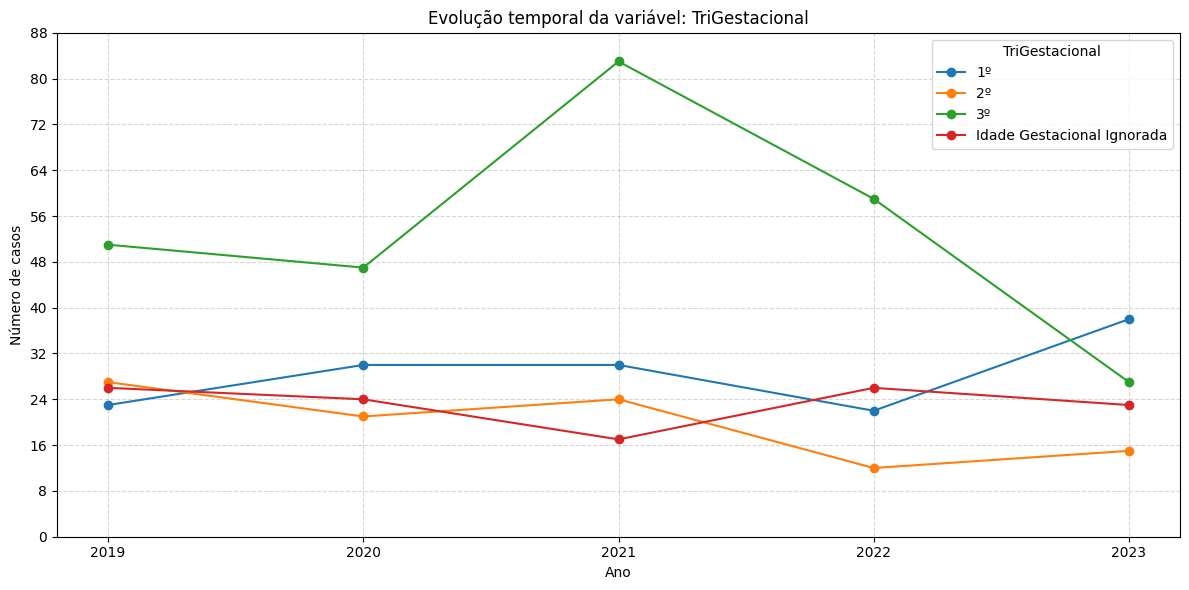

In [38]:
print("\nTrimestre gestacional por gestante:")
print(df['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2019
print("\nTrimestre gestacional por gestante em 2019:")
print(df[df['Ano'] == 2019]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nTrimestre gestacional por gestante em 2020:")
print(df[df['Ano'] == 2020]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nTrimestre gestacional por gestante em 2021:")
print(df[df['Ano'] == 2021]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nTrimestre gestacional por gestante em 2022:")
print(df[df['Ano'] == 2022]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nTrimestre gestacional por gestante em 2023:")
print(df[df['Ano'] == 2023]['TriGestacional'].value_counts(normalize=True) * 100)


multiple_series_line_Chart('TriGestacional', df)

#### Grau de escolaridade das gestantes notificadas com sífilis em Montes Claros 2019 à 2023


Escolaridade por gestante:
Escolaridade
Ignorado                          63.20
Médio completo                    17.60
Médio incompleto                   8.00
5ª à 8ª série incompleta do EF     4.16
Fundamental completo               2.72
Superior incompleta                1.44
4ª série completa do EF            1.12
Educação superior completa         0.96
1ª a 4ª série incompleta do EF     0.80
Name: proportion, dtype: float64

Escolaridade por gestante em 2019:
Escolaridade
Médio completo                    40.944882
Ignorado                          25.196850
Médio incompleto                  14.173228
5ª à 8ª série incompleta do EF     7.874016
Superior incompleta                5.511811
Fundamental completo               2.362205
4ª série completa do EF            2.362205
Educação superior completa         1.574803
Name: proportion, dtype: float64

Escolaridade por gestante em 2020:
Escolaridade
Ignorado                          76.229508
Médio completo                    11.47

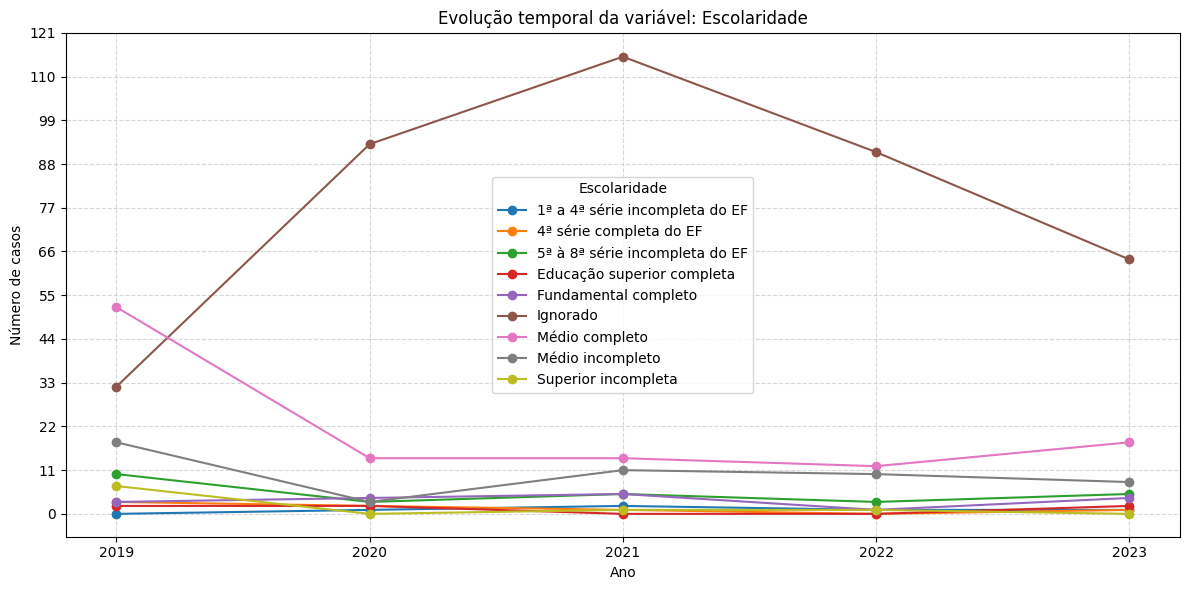

In [39]:
# Grau de escolaridade das gestantes: Proporção por categorias.
print("\nEscolaridade por gestante:")
print(df['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2019
print("\nEscolaridade por gestante em 2019:")
print(df[df['Ano'] == 2019]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nEscolaridade por gestante em 2020:")
print(df[df['Ano'] == 2020]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nEscolaridade por gestante em 2021:")
print(df[df['Ano'] == 2021]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nEscolaridade por gestante em 2022:")
print(df[df['Ano'] == 2022]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nEscolaridade por gestante em 2023:")
print(df[df['Ano'] == 2023]['Escolaridade'].value_counts(normalize=True) * 100)


multiple_series_line_Chart('Escolaridade', df)




#### Conclusão:

#### ATENÇÃO, ao utilizar estas estatísticas de proporção saíba que a amostra foi reduzida afinal boa parte das fichas foram preenchidas de forma errônea ou inconsistente. Portanto, os dados inconsistentes foram ignorados de modo que para qualquer porcentNU_IDADE_Nm lida abaixo deve-se considerar o padrão:
### "Pelo menos x% das gestantes foram ..."
### ou 
### " uma representação do todo de pelo menos x% das notificações denotam ..."


Observou-se que:

1 - A proporção das gestantes notificadas com sífilis entre 2019 e 2023 se fez predominante em residentes de área urbana, de modo que em 2021 foi notificado um recorde de pelo menos 2%, ou seja 4 das 167 gestantes notificadas com sífilis naquele ano eram residentes de zona rural.


1-Branca 2-Preta 3-Amarela
4-Parda 5-Indígena 9- Ignorad

2 - A proporção das gestantes notificadas com sífilis entre 2019 e 2023 se fez predominante em gestantes de raça parda, de modo que em 2019 78.74% das gestantes se identificavam como pardas e essa proporção foi diminuindo de modo que em 2023 fosse de 48.54%. Além de tudo o número de gestantes que assinalaram a seção de ignorado na ficha de investigação cresceu de 5.51% em 2019 para 34.95% em 2023.
    Enquanto isso a menor proporção de gestantes que se identificam como brancas respondeu à ficha em 2020 representando 4.91% da amostra.
    Enquanto isso a maior proporção de gestantes que se identificam como brancas respondeu à ficha em 2023 representando pelo menos 9.7% da amostra.
    Enquanto isso a menor proporção de gestantes que se identificam como pretas respondeu à ficha em 2020 representando 3.27% da amostra.
    Enquanto isso a maior proporção de gestantes que se identificam como pretas respondeu à ficha em 2022 representando 8.4% da amostra.

    E gestantes que se identificavam como indígenas OU amarelas durante os 5 anos representavam sempre menos de 1% da amostra.
    E gestantes que se identificavam como indígenas E as que se identificavam como amarelas durante os 5 anos somatizavam sempre menos de 1% da amostra.
    

3 - A proporção das gestantes notificadas com sífilis entre 2019 e 2023 se fez predominantemente quando as mesmas se encontravam no 3 trimestre gestacional até o ano de 2022. O número de gestantes notificadas no 1º Trimestre gestacional maior que as notificadas em outros períodos gestacionais.

Ademais poe-se perceber uma difícil notificação de gestantes no 2 trimestre gestacional, uma vez que esse número se representa menos de 20% de todas as notificações em todos os anos.

Outra importante observação é que o menor número de notificações de gestantes notificadas no 4 período gestacional ocorreu em 2021 representando aproximadamente 10% de todas as notificações do ano de 2021

É interessante observar que desde 2019 até 2023 o número de gestantes notificadas no 3º trimestre gestacional cairam de uma representação do todo de 40.42% para 27.27 % . Enquanto isso as notificadas no 1º trimestre gestacional aumentaram de uma representação do todo de 18.43 % para 33.76%

Por fim observa-se que o pico em relação à outras notificações ocorreu em 2021, quando as notificações em relação ao todo de gestantes no 3º trimestre gestacional atingiram 55.54%.


4ª Das gestantes notificadas com sífilis entre 2019 e 2023 houve uma prevalência acima de 70% que marcaram ignorado na seção escolaridade à partir de 2020. O ano onde menos houveram marcações nessa alternativa foi em 2019 com uma representação de 63.28% do todo.

### Análise de frequências

Tabela de Frequência com PorcentIdadem:
    Idade  Frequency  PercentIdade
0      10          1          0.16
1      11          1          0.16
2      13          1          0.16
3      14          3          0.48
4      15          8          1.28
5      16         17          2.72
6      17         33          5.28
7      18         31          4.96
8      19         59          9.44
9      20         62          9.92
10     21         41          6.56
11     22         57          9.12
12     23         50          8.00
13     24         34          5.44
14     25         32          5.12
15     26         30          4.80
16     27         17          2.72
17     28         23          3.68
18     29         25          4.00
19     30         19          3.04
20     31         13          2.08
21     32         11          1.76
22     33          7          1.12
23     34          3          0.48
24     35          7          1.12
25     36          8          1.28
26     37      

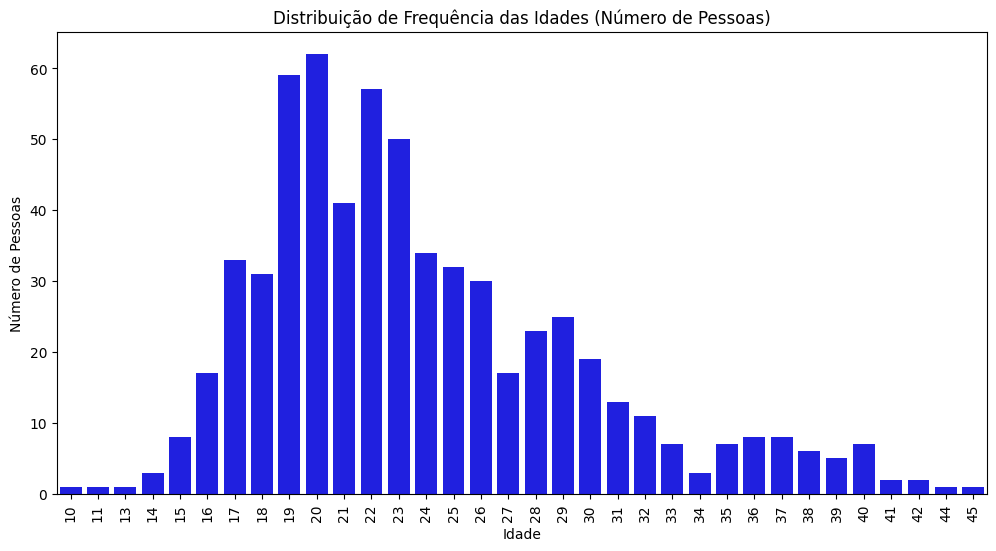

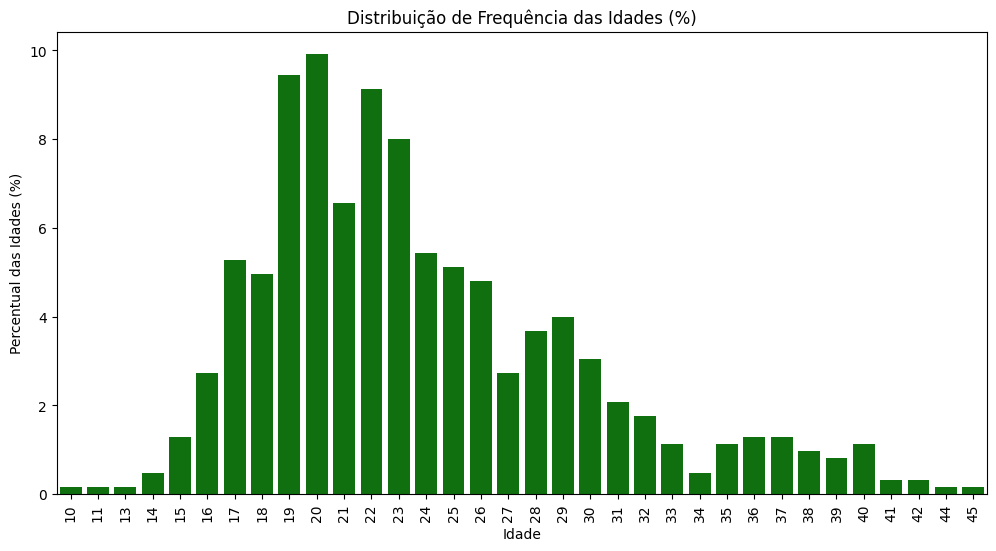

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df é o DataFrame com as idades já processadas
# Exemplo de criação de df (caso ainda não tenha sido feito):
# Idades = df['Idade'].astype(str).apply(lambda x: [x[i:i+2] for i in range(0, len(x), 2)]).explode()
# Idades = Idades.astype(int)
# df = pd.DataFrame(Idades, columns=['Idade'])

# Criar a tabela de frequência absoluta
freq_table = df['Idade'].value_counts().sort_index().reset_index()
freq_table.columns = ['Idade', 'Frequency']

# Calcular a frequência relativa (porcentIdadem)
total_pessoas = freq_table['Frequency'].sum()
freq_table['PercentIdade'] = (freq_table['Frequency'] / total_pessoas) * 100

# Exibir a tabela de frequência com porcentIdadem
print("Tabela de Frequência com PorcentIdadem:")
print(freq_table)

# Gerar o gráfico de barras para as frequências absolutas
plt.figure(figsize=(12, 6))
sns.barplot(x='Idade', y='Frequency', data=freq_table, color='blue')
plt.title('Distribuição de Frequência das Idades (Número de Pessoas)')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=90)
plt.show()

# Gerar o gráfico de barras para as frequências relativas (porcentIdadem)
plt.figure(figsize=(12, 6))
sns.barplot(x='Idade', y='PercentIdade', data=freq_table, color='green')
plt.title('Distribuição de Frequência das Idades (%)')
plt.xlabel('Idade')
plt.ylabel('Percentual das Idades (%)')
plt.xticks(rotation=90)
plt.show()

In [41]:
import pandas as pd

# Supondo que df é o DataFrame com as idades já processadas
# Exemplo de criação de df (caso ainda não tenha sido feito):
# ages = df['Idade'].astype(str).apply(lambda x: [x[i:i+2] for i in range(0, len(x), 2)]).explode()
# ages = ages.astype(int)
# df = pd.DataFrame(ages, columns=['Age'])

# Criar a tabela de frequência absoluta e relativa
freq_table = df['Idade'].value_counts().sort_index().reset_index()
freq_table.columns = ['Idade', 'Frequency']
total_pessoas = freq_table['Frequency'].sum()
freq_table['Percentage'] = (freq_table['Frequency'] / total_pessoas) * 100

# Formatando a coluna de porcentagem para exibir 2 casas decimais
freq_table['Percentage'] = freq_table['Percentage'].round(2)

# Gerar a tabela em LaTeX
latex_table = freq_table.to_latex(index=False, 
                                 caption="Tabela de Frequência de Idades", 
                                 label="tab:frequencia_idades",
                                 column_format="|c|c|c|",
                                 header=["Idade", "Frequência", "Porcentagem (%)"])

# Exibir o código LaTeX gerado
print(latex_table)

\begin{table}
\caption{Tabela de Frequência de Idades}
\label{tab:frequencia_idades}
\begin{tabular}{|c|c|c|}
\toprule
Idade & Frequência & Porcentagem (%) \\
\midrule
10 & 1 & 0.160000 \\
11 & 1 & 0.160000 \\
13 & 1 & 0.160000 \\
14 & 3 & 0.480000 \\
15 & 8 & 1.280000 \\
16 & 17 & 2.720000 \\
17 & 33 & 5.280000 \\
18 & 31 & 4.960000 \\
19 & 59 & 9.440000 \\
20 & 62 & 9.920000 \\
21 & 41 & 6.560000 \\
22 & 57 & 9.120000 \\
23 & 50 & 8.000000 \\
24 & 34 & 5.440000 \\
25 & 32 & 5.120000 \\
26 & 30 & 4.800000 \\
27 & 17 & 2.720000 \\
28 & 23 & 3.680000 \\
29 & 25 & 4.000000 \\
30 & 19 & 3.040000 \\
31 & 13 & 2.080000 \\
32 & 11 & 1.760000 \\
33 & 7 & 1.120000 \\
34 & 3 & 0.480000 \\
35 & 7 & 1.120000 \\
36 & 8 & 1.280000 \\
37 & 8 & 1.280000 \\
38 & 6 & 0.960000 \\
39 & 5 & 0.800000 \\
40 & 7 & 1.120000 \\
41 & 2 & 0.320000 \\
42 & 2 & 0.320000 \\
44 & 1 & 0.160000 \\
45 & 1 & 0.160000 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\joaog\AppData\Local\Temp\ipykernel_11240\374832971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=notificacoes_por_ano, x='Ano', y='Total_Notificacoes', palette='Reds')


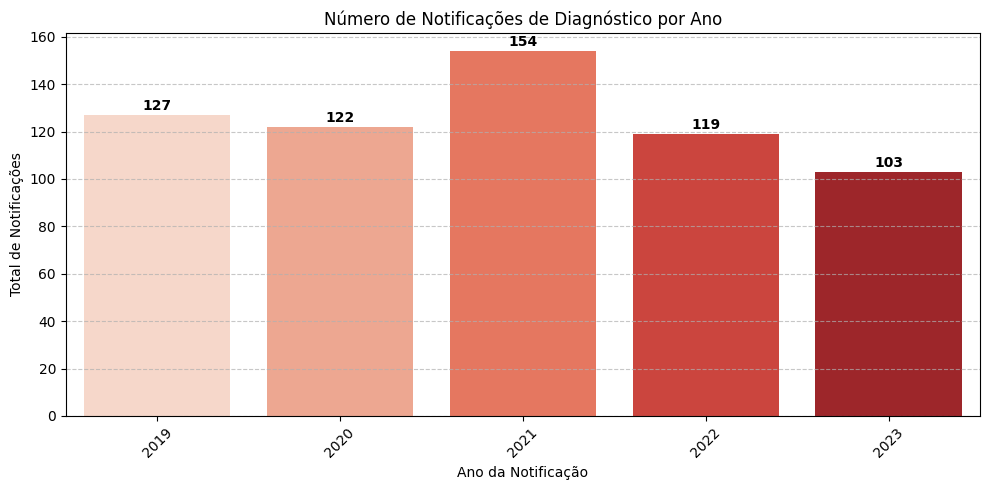

In [49]:
# Agrupando os dados por ano e contando o número de notificações
notificacoes_por_ano = df.groupby('Ano').size().reset_index(name='Total_Notificacoes')

# Criando o gráfico de barras
plt.figure(figsize=(10,5))
ax = sns.barplot(data=notificacoes_por_ano, x='Ano', y='Total_Notificacoes', palette='Reds')

# Adicionando os valores acima das barras
for index, row in notificacoes_por_ano.iterrows():
    plt.text(x=index, 
             y=row['Total_Notificacoes'] + 1, 
             s=str(row['Total_Notificacoes']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalizando o gráfico
plt.xlabel('Ano da Notificação')
plt.ylabel('Total de Notificações')
plt.title('Número de Notificações de Diagnóstico por Ano')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


C:\Users\joaog\AppData\Local\Temp\ipykernel_11240\231034990.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=notificacoes_por_ano, x='Ano', y='Percentual', palette='Blues')


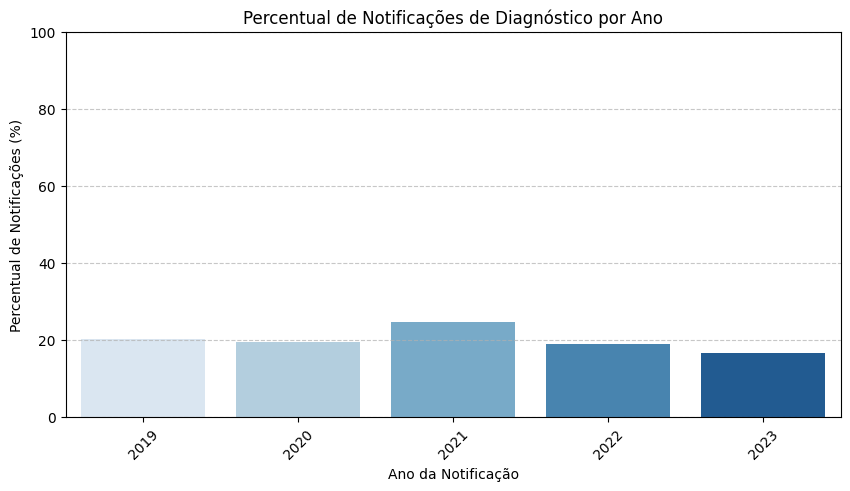

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contando o número de notificações por ano
notificacoes_por_ano = df['Ano'].value_counts(normalize=True).reset_index()
notificacoes_por_ano.columns = ['Ano', 'Percentual']
notificacoes_por_ano = notificacoes_por_ano.sort_values(by='Ano')

# Convertendo percentual para escala de 0 a 100
notificacoes_por_ano['Percentual'] *= 100  

# Criando o gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(data=notificacoes_por_ano, x='Ano', y='Percentual', palette='Blues')

# Personalizando o gráfico
plt.xlabel('Ano da Notificação')
plt.ylabel('Percentual de Notificações (%)')
plt.title('Percentual de Notificações de Diagnóstico por Ano')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Exibindo os valores no topo das barras
# for index, row in notificacoes_por_ano.iterrows():
#     plt.text(row['Ano'], row['Percentual'] + 1, f"{row['Percentual']:.1f}%", ha='center', fontsize=10)

# Exibindo o gráfico
plt.show()



Residência por gestante:
Residencia
Urbana      614
Rural         9
Ignorado      2
Name: count, dtype: int64

Residência por gestante em 2019:
Residencia
Urbana    126
Rural       1
Name: count, dtype: int64

Residência por gestante em 2020:
Residencia
Urbana    122
Name: count, dtype: int64

Residência por gestante em 2021:
Residencia
Urbana      148
Rural         4
Ignorado      2
Name: count, dtype: int64

Residência por gestante em 2022:
Residencia
Urbana    117
Rural       2
Name: count, dtype: int64

Residência por gestante em 2023:
Residencia
Urbana    101
Rural       2
Name: count, dtype: int64


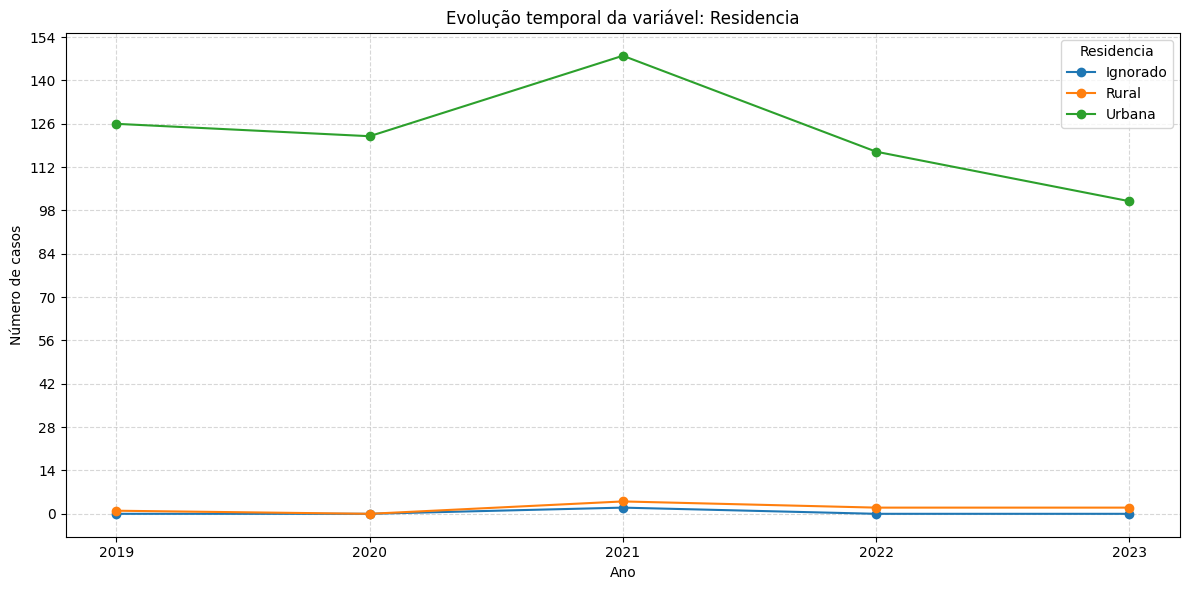

In [44]:
print("\nResidência por gestante:")
print(df['Residencia'].value_counts())

print("\nResidência por gestante em 2019:")
print(df[df['Ano'] == 2019]['Residencia'].value_counts())

print("\nResidência por gestante em 2020:")
print(df[df['Ano'] == 2020]['Residencia'].value_counts())

print("\nResidência por gestante em 2021:")
print(df[df['Ano'] == 2021]['Residencia'].value_counts())

print("\nResidência por gestante em 2022:")
print(df[df['Ano'] == 2022]['Residencia'].value_counts())

print("\nResidência por gestante em 2023:")
print(df[df['Ano'] == 2023]['Residencia'].value_counts())

multiple_series_line_Chart('Residencia', DataFrame=df)



Raça por gestante:
Raca
Parda                      402
Não Assinalado na Ficha    134
Branca                      46
Preta                       40
Amarela                      2
Indígena                     1
Name: count, dtype: int64

Raça por gestante em 2019:
Raca
Parda                      100
Preta                        9
Branca                       9
Não Assinalado na Ficha      7
Indígena                     1
Amarela                      1
Name: count, dtype: int64

Raça por gestante em 2020:
Raca
Parda                      79
Não Assinalado na Ficha    33
Branca                      6
Preta                       4
Name: count, dtype: int64

Raça por gestante em 2021:
Raca
Parda                      99
Não Assinalado na Ficha    31
Branca                     13
Preta                      10
Amarela                     1
Name: count, dtype: int64

Raça por gestante em 2022:
Raca
Parda                      74
Não Assinalado na Ficha    27
Preta                      10
Branca 

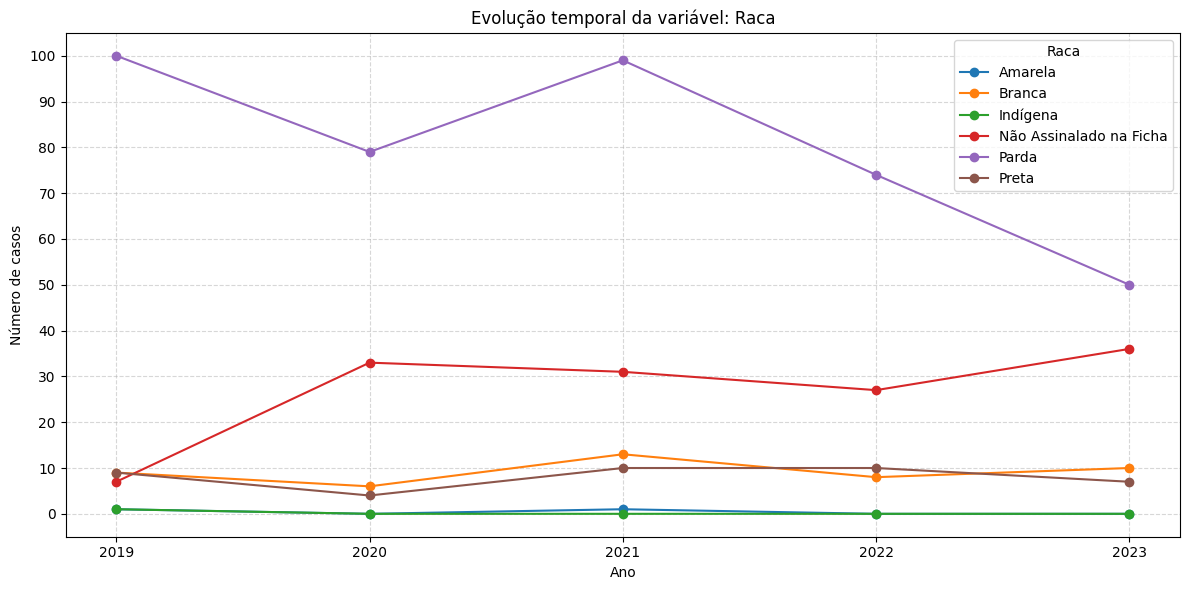

In [45]:
print("\nRaça por gestante:")
print(df['Raca'].value_counts())

print("\nRaça por gestante em 2019:")
print(df[df['Ano'] == 2019]['Raca'].value_counts())

print("\nRaça por gestante em 2020:")
print(df[df['Ano'] == 2020]['Raca'].value_counts())

print("\nRaça por gestante em 2021:")
print(df[df['Ano'] == 2021]['Raca'].value_counts())

print("\nRaça por gestante em 2022:")
print(df[df['Ano'] == 2022]['Raca'].value_counts())

print("\nRaça por gestante em 2023:")
print(df[df['Ano'] == 2023]['Raca'].value_counts())


multiple_series_line_Chart('Raca', df)



Trimestre gestacional por gestante:
TriGestacional
3º                            267
1º                            143
Idade Gestacional Ignorada    116
2º                             99
Name: count, dtype: int64

Trimestre gestacional por gestante em 2019:
TriGestacional
3º                            51
2º                            27
Idade Gestacional Ignorada    26
1º                            23
Name: count, dtype: int64

Trimestre gestacional por gestante em 2020:
TriGestacional
3º                            47
1º                            30
Idade Gestacional Ignorada    24
2º                            21
Name: count, dtype: int64

Trimestre gestacional por gestante em 2021:
TriGestacional
3º                            83
1º                            30
2º                            24
Idade Gestacional Ignorada    17
Name: count, dtype: int64

Trimestre gestacional por gestante em 2022:
TriGestacional
3º                            59
Idade Gestacional Ignorada    26
1º    

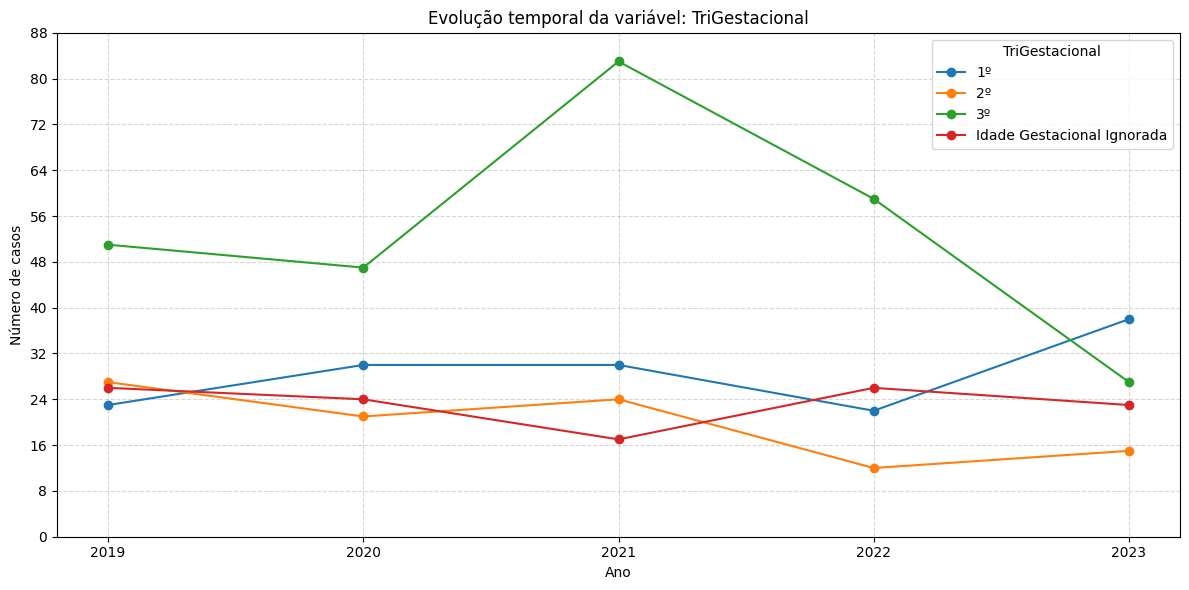

In [46]:
print("\nTrimestre gestacional por gestante:")
print(df['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2019:")
print(df[df['Ano'] == 2019]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2020:")
print(df[df['Ano'] == 2020]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2021:")
print(df[df['Ano'] == 2021]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2022:")
print(df[df['Ano'] == 2022]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2023:")
print(df[df['Ano'] == 2023]['TriGestacional'].value_counts())

multiple_series_line_Chart('TriGestacional', df)



Escolaridade por gestante:
Escolaridade
Ignorado                          395
Médio completo                    110
Médio incompleto                   50
5ª à 8ª série incompleta do EF     26
Fundamental completo               17
Superior incompleta                 9
4ª série completa do EF             7
Educação superior completa          6
1ª a 4ª série incompleta do EF      5
Name: count, dtype: int64

Escolaridade por gestante em 2019:
Escolaridade
Médio completo                    52
Ignorado                          32
Médio incompleto                  18
5ª à 8ª série incompleta do EF    10
Superior incompleta                7
Fundamental completo               3
4ª série completa do EF            3
Educação superior completa         2
Name: count, dtype: int64

Escolaridade por gestante em 2020:
Escolaridade
Ignorado                          93
Médio completo                    14
Fundamental completo               4
5ª à 8ª série incompleta do EF     3
Médio incompleto       

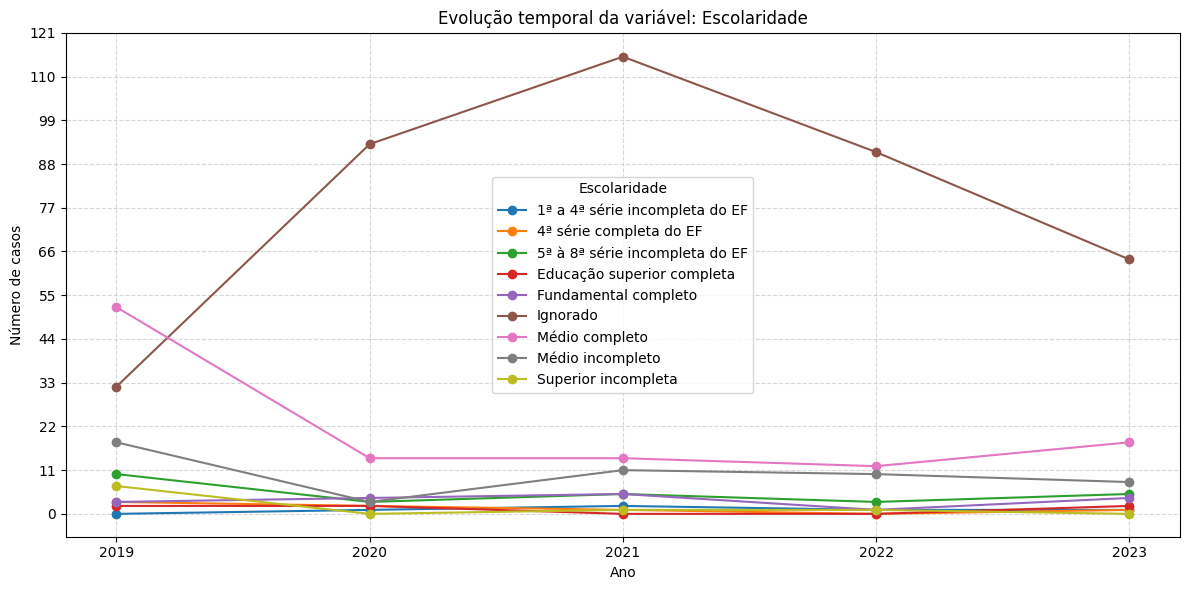

In [47]:
print("\nEscolaridade por gestante:")
print(df['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2019:")
print(df[df['Ano'] == 2019]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2020:")
print(df[df['Ano'] == 2020]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2021:")
print(df[df['Ano'] == 2021]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2022:")
print(df[df['Ano'] == 2022]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2023:")
print(df[df['Ano'] == 2023]['Escolaridade'].value_counts())

multiple_series_line_Chart('Escolaridade', df)


In [48]:
def gerar_tabela_qualitativa_por_ano(df, coluna, col_ano='Ano'):
    anos = sorted(df[col_ano].dropna().unique())
    tabelas_latex = {}

    for ano in anos:
        dados_ano = df[df[col_ano] == ano][coluna].value_counts().reset_index()
        dados_ano.columns = [coluna, 'Frequência']
        total = dados_ano['Frequência'].sum()
        dados_ano['%'] = (dados_ano['Frequência'] / total * 100).round(2)

        latex_table = dados_ano.to_latex(index=False, caption=f'Estatística descritiva de {coluna} - Ano {ano}',
                                         label=f'tab:{coluna.lower()}_{ano}', column_format='lrr')
        tabelas_latex[ano] = latex_table

    return tabelas_latex


In [ ]:

tabela = gerar_tabela_qualitativa_por_ano(df, 'Escolaridade', col_ano='Ano')

tabela

KeyError: 0